In [2]:
# Import networkx library and rename it as nx. 
import networkx as nx

# Other packages required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
edgelist_df = pd.DataFrame({'node1':[0,0,1,1,2,2,2,3,3,4,5,6,6,7], 
                            'node2':[1,7,2,7,3,8,5,5,4,5,6,7,8,8], 
                            'weights':[4,8,8,11,7,2,4,14,9,10,2,1,6,7]})
edgelist_df

,node1,node2,weights
0,0,1,4
1,0,7,8
2,1,2,8
3,1,7,11
4,2,3,7
5,2,8,2
6,2,5,4
7,3,5,14
8,3,4,9
9,4,5,10


In [8]:
g = nx.Graph()
for i, elrow in edgelist_df.iterrows():
    g.add_edge(elrow[0], elrow[1], weight=elrow[2])
    g.add_node(1,pos=(0,5))
g.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 7, {'weight': 8}), (1, 2, {'weight': 8}), (1, 7, {'weight': 11}), (7, 6, {'weight': 1}), (7, 8, {'weight': 7}), (2, 3, {'weight': 7}), (2, 8, {'weight': 2}), (2, 5, {'weight': 4}), (3, 5, {'weight': 14}), (3, 4, {'weight': 9}), (8, 6, {'weight': 6}), (5, 4, {'weight': 10}), (5, 6, {'weight': 2})])

In [9]:
# for each node we are trying to fix the coordinates
g.add_node(0,pos=(0,5))
g.add_node(1,pos=(5,10))
g.add_node(2,pos=(10,10))
g.add_node(3,pos=(15,10))
g.add_node(4,pos=(20,5))
g.add_node(5,pos=(15,0))
g.add_node(6,pos=(10,0))
g.add_node(7,pos=(5,0))
g.add_node(8,pos=(10,5))
g.nodes(data=True)

NodeDataView({0: {'pos': (0, 5)}, 1: {'pos': (5, 10)}, 7: {'pos': (5, 0)}, 2: {'pos': (10, 10)}, 3: {'pos': (15, 10)}, 8: {'pos': (10, 5)}, 5: {'pos': (15, 0)}, 4: {'pos': (20, 5)}, 6: {'pos': (10, 0)}})

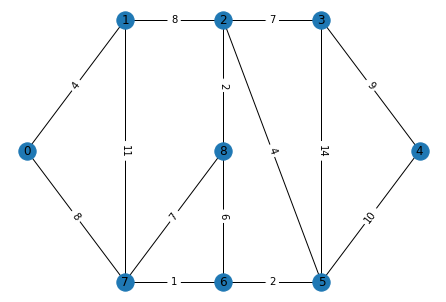

In [10]:
# This function gets the coordinates for nodes
pos = nx.get_node_attributes(g,'pos')

# This function gets the weights for the edges 
weight = nx.get_edge_attributes(g,'weight')

# The simplest way to draw a graph is by using nx.draw. 
nx.draw(g,pos, with_labels=True)

# This adds edge lables
nx.draw_networkx_edge_labels(g,pos,edge_labels = weight)
plt.show()

In [19]:
import collections

min_spanning_tree_nodes = []
min_spanning_tree_edges = []
weight = nx.get_edge_attributes(g,'weight')

sorted_weights = sorted(weight.items(), key=lambda kv: kv[1])
sorted_weights

[((7, 6), 1),
 ((2, 8), 2),
 ((5, 6), 2),
 ((0, 1), 4),
 ((2, 5), 4),
 ((8, 6), 6),
 ((7, 8), 7),
 ((2, 3), 7),
 ((0, 7), 8),
 ((1, 2), 8),
 ((3, 4), 9),
 ((5, 4), 10),
 ((1, 7), 11),
 ((3, 5), 14)]

In [21]:
for edge in sorted_weights:
    if((edge[0][0] in min_spanning_tree_nodes) and (edge[0][1] in min_spanning_tree_nodes)):
        pass
    else:
        min_spanning_tree_nodes.extend([edge[0][0], edge[0][1]])
        min_spanning_tree_edges.append(edge[0])
min_spanning_tree_edges

[(7, 6), (2, 8), (0, 1), (3, 4), (5, 6)]

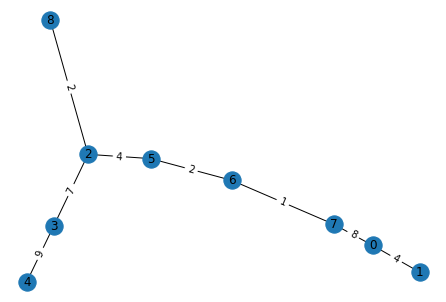

In [24]:
min_span_G0 = nx.minimum_spanning_tree(g)


def showGraphwithWeight(graph_w):
    pos = nx.spring_layout(graph_w)
    # draw the graph with the node position based on pos
    nx.draw(graph_w, pos, with_labels = True)
    labels = nx.get_edge_attributes(graph_w,'weight')
    # draw the edge weight
    nx.draw_networkx_edge_labels(graph_w, pos, edge_labels = labels)
showGraphwithWeight(min_span_G0)